<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [18]:
!pip install pandas 
!pip install matplotlib
!pip install numpy 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-12-25 23:59:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.4MB/s    in 2.2s    

2025-12-25 23:59:45 (68.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


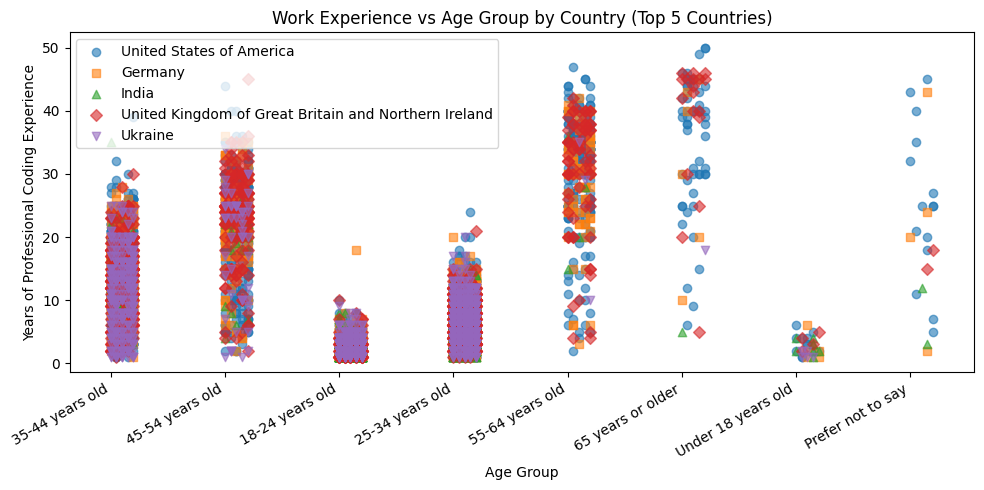

In [4]:
##Write your code here
# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Keep only required columns
plot_df = df.dropna(subset=['Age', 'Country', 'YearsCodePro'])

# Select top 5 countries by respondent count
top_countries = plot_df['Country'].value_counts().head(5).index
plot_df = plot_df[plot_df['Country'].isin(top_countries)]

# Map age groups to numeric x positions
age_groups = plot_df['Age'].unique().tolist()
age_to_x = {age: i for i, age in enumerate(age_groups)}
plot_df['AgeX'] = plot_df['Age'].map(age_to_x)

# Add small jitter so points spread horizontally
plot_df['AgeX'] = plot_df['AgeX'] + (pd.Series(range(len(plot_df))) % 5) * 0.05

# Marker styles for age groups
markers = ['o', 's', '^', 'D', 'v', 'x', 'P', '*']

plt.figure(figsize=(10, 5))

for i, country in enumerate(top_countries):
    subset = plot_df[plot_df['Country'] == country]
    plt.scatter(
        subset['AgeX'],
        subset['YearsCodePro'],
        alpha=0.6,
        label=country,
        marker=markers[i % len(markers)]
    )

plt.xticks(range(len(age_groups)), age_groups, rotation=30, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Work Experience vs Age Group by Country (Top 5 Countries)')
plt.legend()
plt.tight_layout()
plt.show()

# The bubble plot shows how participation frequency varies across age groups, with bubble size indicating job satisfaction. Respondents of different ages participate at varying frequencies, and larger bubbles appear across multiple age groups, suggesting that higher job satisfaction is not limited to a single age range or participation level. Overall, the plot indicates no single age group dominates participation or satisfaction.

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


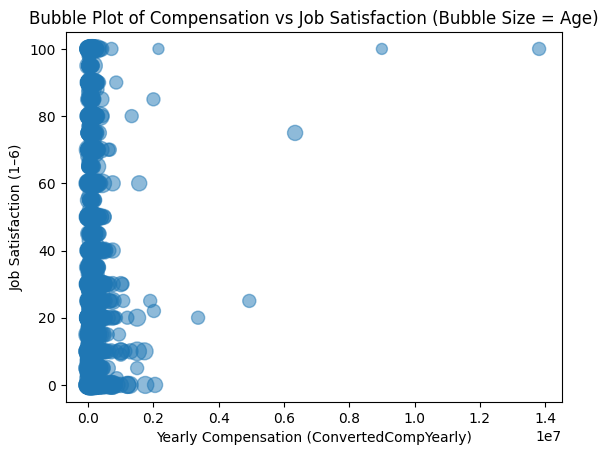

In [6]:
##Write your code here
# Convert needed columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Convert Age groups to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop invalid rows
plot_df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric'])

# Bubble plot
plt.scatter(
    plot_df['ConvertedCompYearly'],
    plot_df['JobSatPoints_6'],
    s=plot_df['AgeNumeric'] * 3,   # bubble size = age
    alpha=0.5
)

plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (1–6)')
plt.title('Bubble Plot of Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.show()

# The bubble plot shows that job satisfaction varies across all compensation levels, with no strong linear relationship between pay and satisfaction. Larger bubbles appear across a wide range of compensation values, indicating that age influences compensation levels but does not solely determine job satisfaction.

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



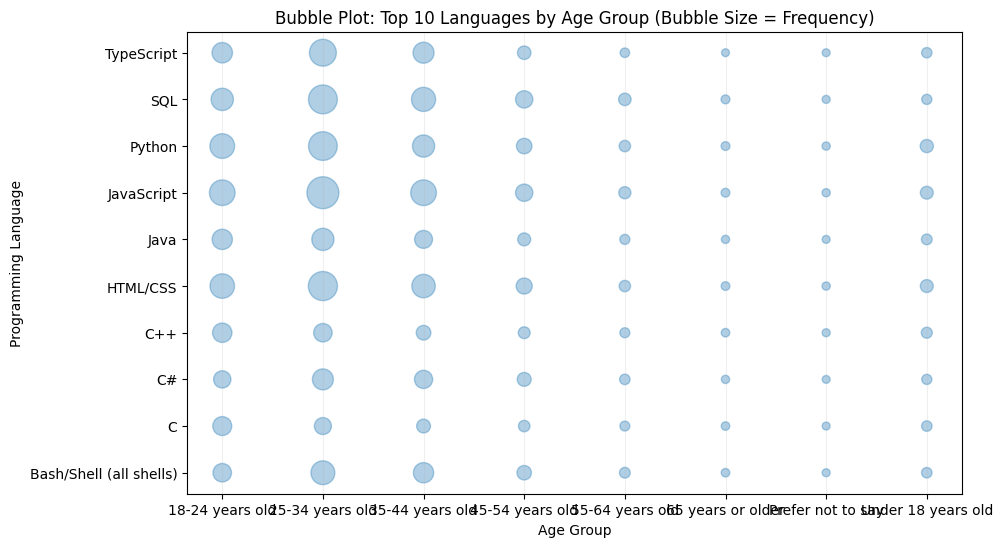

In [9]:
##Write your code here
d = df[['Age','LanguageHaveWorkedWith']].dropna()
d = d[d['LanguageHaveWorkedWith'].astype(str).str.strip().ne('')]

# explode languages
d = d.assign(LanguageHaveWorkedWith=d['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')
d['LanguageHaveWorkedWith'] = d['LanguageHaveWorkedWith'].str.strip()

# top 10 languages overall
top_langs = d['LanguageHaveWorkedWith'].value_counts().head(10).index
d = d[d['LanguageHaveWorkedWith'].isin(top_langs)]

# count by (Age group, Language)
counts = d.groupby(['Age','LanguageHaveWorkedWith']).size().reset_index(name='freq')

# scale bubble sizes so they don't fill the whole chart
counts['size'] = 30 + (counts['freq'] / counts['freq'].max()) * 500

plt.figure(figsize=(10,6))
plt.scatter(counts['Age'], counts['LanguageHaveWorkedWith'], s=counts['size'], alpha=0.35)
plt.title('Bubble Plot: Top 10 Languages by Age Group (Bubble Size = Frequency)')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.grid(True, axis='x', alpha=0.2)
plt.show()

# Each bubble represents how often a language appears within an age group. Larger bubbles indicate higher frequency. This helps compare which languages dominate across age groups without the plot becoming unreadable from overlapping points.

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


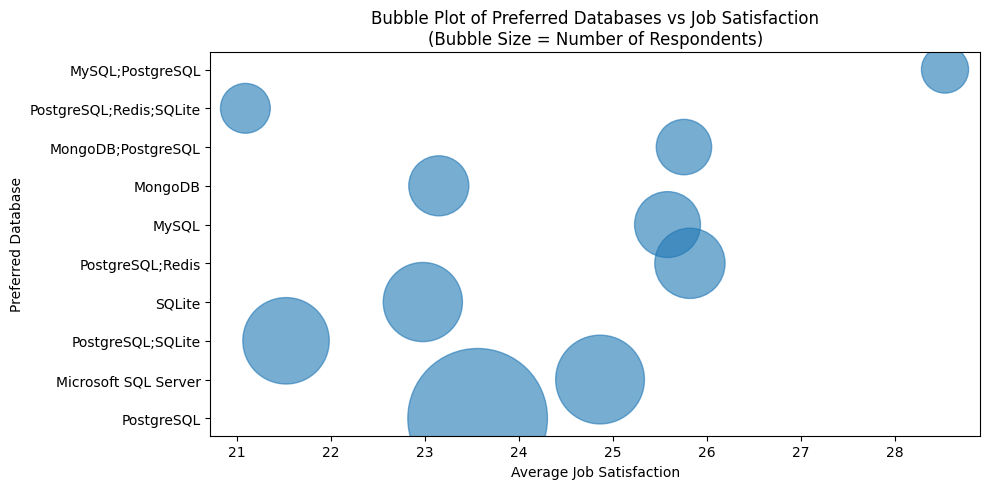

In [11]:
##Write your code here
# Keep needed columns
d = df[['DatabaseWantToWorkWith', 'JobSatPoints_6']].dropna()

# Convert job satisfaction to numeric
d['JobSatPoints_6'] = pd.to_numeric(d['JobSatPoints_6'], errors='coerce')
d = d.dropna(subset=['JobSatPoints_6'])

# Aggregate: average job satisfaction + respondent count per database
summary = (
    d.groupby('DatabaseWantToWorkWith')
     .agg(
         AvgJobSat=('JobSatPoints_6', 'mean'),
         Count=('JobSatPoints_6', 'size')
     )
     .reset_index()
)

# Keep top 10 databases by respondent count
summary = summary.sort_values('Count', ascending=False).head(10)

# Bubble plot
plt.figure(figsize=(10, 5))
plt.scatter(
    summary['AvgJobSat'],
    summary['DatabaseWantToWorkWith'],
    s=summary['Count'] * 5,
    alpha=0.6
)

plt.xlabel('Average Job Satisfaction')
plt.ylabel('Preferred Database')
plt.title('Bubble Plot of Preferred Databases vs Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.tight_layout()
plt.show()

# The bubble plot shows differences in average job satisfaction across preferred databases, with bubble size indicating how many respondents prefer each database. Some databases combine higher popularity with moderate to high job satisfaction, while others show smaller user bases or lower average satisfaction. This suggests that both popularity and user satisfaction vary by database technology.

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


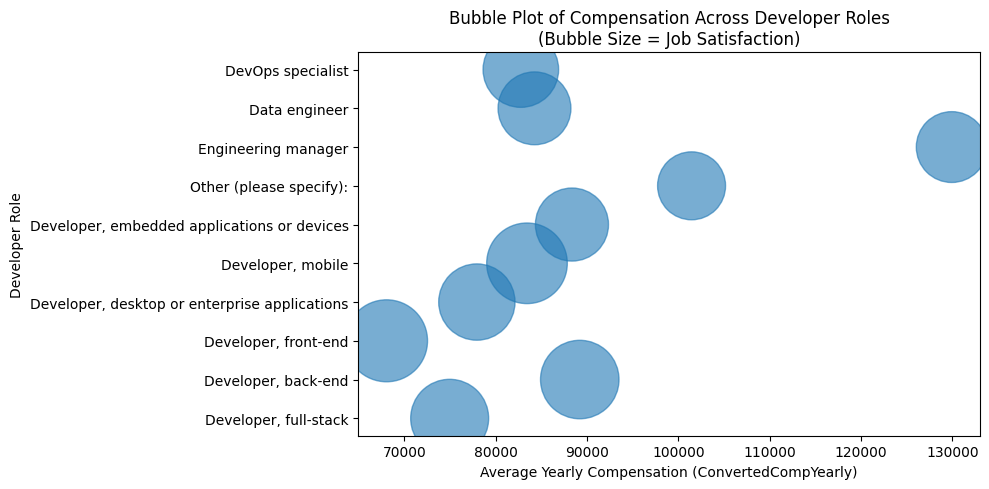

In [14]:
##Write your code here
# Keep needed columns
d = df[['DevType', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Convert to numeric
d['ConvertedCompYearly'] = pd.to_numeric(d['ConvertedCompYearly'], errors='coerce')
d['JobSatPoints_6'] = pd.to_numeric(d['JobSatPoints_6'], errors='coerce')
d = d.dropna()

# Aggregate by developer role
summary = (
    d.groupby('DevType')
     .agg(
         AvgComp=('ConvertedCompYearly', 'mean'),
         AvgJobSat=('JobSatPoints_6', 'mean'),
         Count=('DevType', 'size')
     )
     .reset_index()
)

# Keep top 10 roles by respondent count
summary = summary.sort_values('Count', ascending=False).head(10)

# Bubble plot
plt.figure(figsize=(10, 5))
plt.scatter(
    summary['AvgComp'],
    summary['DevType'],
    s=summary['AvgJobSat'] * 120,   # bubble size = job satisfaction
    alpha=0.6
)

plt.xlabel('Average Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Developer Role')
plt.title('Bubble Plot of Compensation Across Developer Roles\n(Bubble Size = Job Satisfaction)')
plt.tight_layout()
plt.show()

# The bubble plot shows differences in average compensation across developer roles, with bubble size indicating average job satisfaction. Some roles combine higher compensation with higher satisfaction, while others show lower compensation or smaller satisfaction levels. This suggests that both pay and satisfaction vary meaningfully by developer role.

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


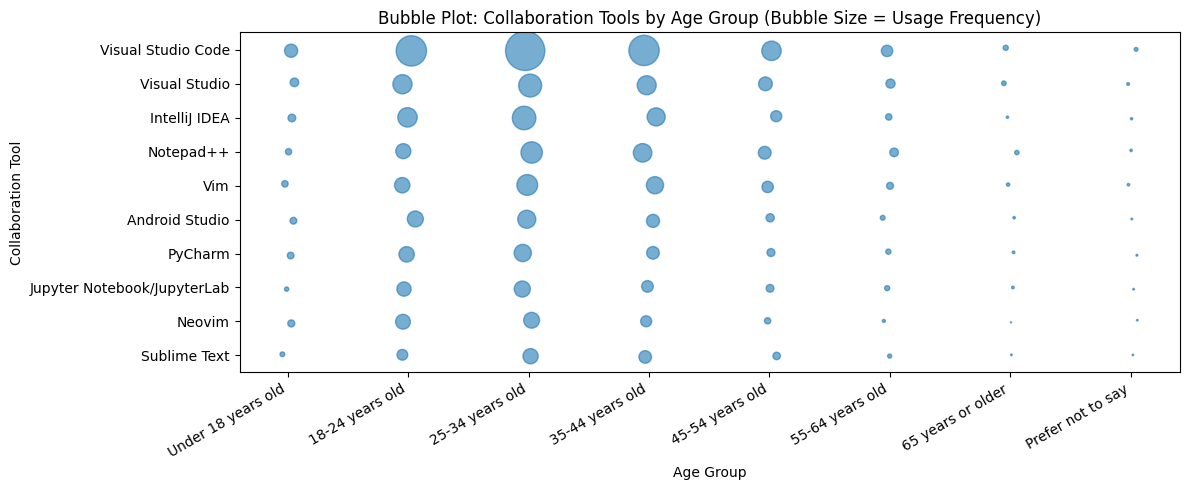

In [19]:
##Write your code here

# Keep only what we need
d = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Use AgeGroup (as text) if you already have it; otherwise bucket Age into groups like the survey
# If your dataset already has 'Age' as age-groups (strings), skip the next line and just do: d['AgeGroup'] = d['Age']
d['AgeGroup'] = d['Age']

# Split multi-select tools into rows
d = d.assign(Tool=d['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')
d['Tool'] = d['Tool'].str.strip()
d = d.dropna(subset=['Tool', 'AgeGroup'])

# Top 10 tools only (prevents clutter)
top_tools = d['Tool'].value_counts().head(10).index
d = d[d['Tool'].isin(top_tools)]

# Count frequency by AgeGroup + Tool
g = d.groupby(['AgeGroup', 'Tool']).size().reset_index(name='Count')

# Order age groups (edit if your exact labels differ)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]
g = g[g['AgeGroup'].isin(age_order)]
g['AgePos'] = g['AgeGroup'].map({a:i for i,a in enumerate(age_order)})

# Tool positions (so Y is numeric)
tool_order = list(top_tools)[::-1]
g['ToolPos'] = g['Tool'].map({t:i for i,t in enumerate(tool_order)})

# Scale bubbles so they don't take over the plot
sizes = (g['Count'] / g['Count'].max()) * 800  # adjust 800 up/down if needed

# Jitter a tiny bit to avoid perfect overlap
x = g['AgePos'] + (0.12 * (np.random.rand(len(g)) - 0.5))
y = g['ToolPos'] + (0.12 * (np.random.rand(len(g)) - 0.5))

plt.figure(figsize=(12, 5))
plt.scatter(x, y, s=sizes, alpha=0.6)
plt.xticks(range(len(age_order)), age_order, rotation=30, ha='right')
plt.yticks(range(len(tool_order)), tool_order)
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.title('Bubble Plot: Collaboration Tools by Age Group (Bubble Size = Usage Frequency)')
plt.tight_layout()
plt.show()

# The bubble plot illustrates how the use of collaboration tools varies across different age groups, with bubble size representing the frequency of tool usage. Some tools show consistently large bubbles across multiple age groups, indicating widespread adoption regardless of age, while other tools display larger bubbles concentrated in specific age ranges, suggesting age-related preferences. Overall, the visualization highlights that collaboration tool usage is not uniform across age groups and that both generational factors and familiarity with certain tools influence technology adoption patterns.

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



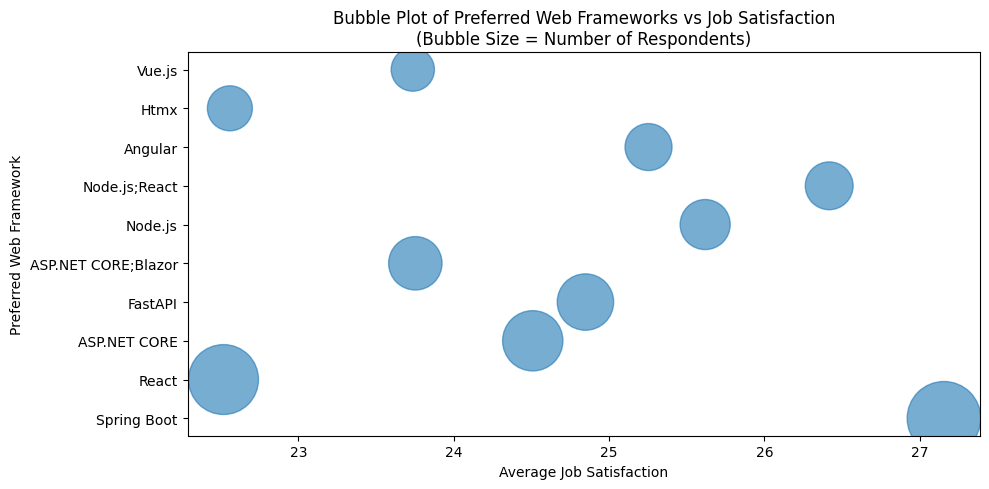

In [21]:
##Write your code here
# Keep required columns
d = df[['WebframeWantToWorkWith', 'JobSatPoints_6']].dropna()

# Convert job satisfaction to numeric
d['JobSatPoints_6'] = pd.to_numeric(d['JobSatPoints_6'], errors='coerce')
d = d.dropna(subset=['JobSatPoints_6'])

# Aggregate by web framework
summary = (
    d.groupby('WebframeWantToWorkWith')
     .agg(
         AvgJobSat=('JobSatPoints_6', 'mean'),
         Count=('JobSatPoints_6', 'size')
     )
     .reset_index()
)

# Keep top 10 frameworks by respondent count
summary = summary.sort_values('Count', ascending=False).head(10)

# Bubble plot
plt.figure(figsize=(10, 5))
plt.scatter(
    summary['AvgJobSat'],
    summary['WebframeWantToWorkWith'],
    s=summary['Count'] * 5,
    alpha=0.6
)

plt.xlabel('Average Job Satisfaction')
plt.ylabel('Preferred Web Framework')
plt.title('Bubble Plot of Preferred Web Frameworks vs Job Satisfaction\n(Bubble Size = Number of Respondents)')
plt.tight_layout()
plt.show()

# The bubble plot shows how average job satisfaction varies across preferred web frameworks, with bubble size indicating the number of respondents interested in each framework. Some frameworks combine higher popularity with moderate to high job satisfaction, while others have smaller user bases or lower average satisfaction. This suggests that preferences for web frameworks differ not only in popularity but also in how they relate to developers’ job satisfaction.


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



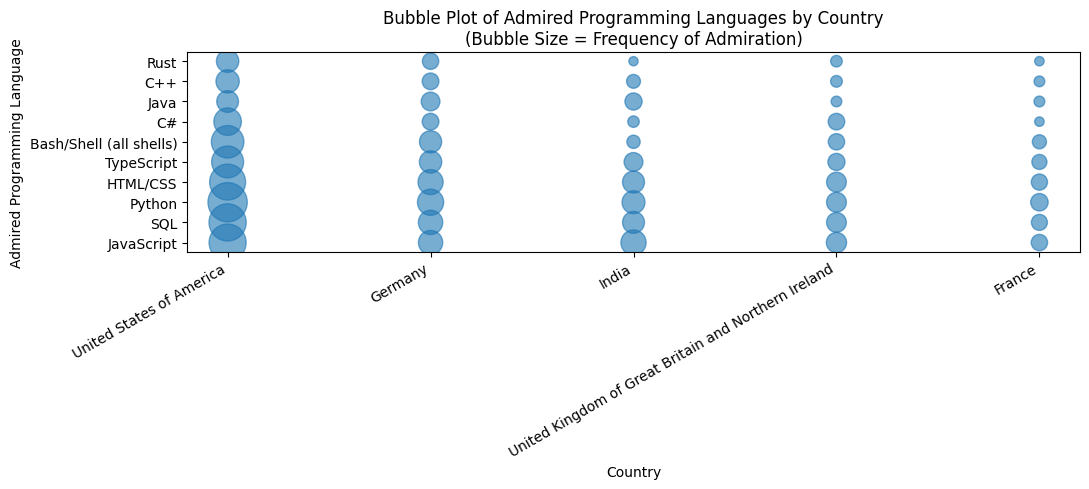

In [24]:
##Write your code here
# Keep required columns
d = df[['Country', 'LanguageAdmired']].dropna()

# Split and explode languages
d = d.assign(Language=d['LanguageAdmired'].str.split(';')).explode('Language')
d['Language'] = d['Language'].str.strip()

# Top 5 countries and top 10 languages
top_countries = d['Country'].value_counts().head(5).index
top_languages = d['Language'].value_counts().head(10).index
d = d[d['Country'].isin(top_countries) & d['Language'].isin(top_languages)]

# Count frequency
counts = (
    d.groupby(['Country', 'Language'])
     .size()
     .reset_index(name='Freq')
)

# Map categories to numeric positions
country_order = list(top_countries)
language_order = list(top_languages)

counts['CountryX'] = counts['Country'].map({c:i for i,c in enumerate(country_order)})
counts['LanguageY'] = counts['Language'].map({l:i for i,l in enumerate(language_order)})

# Scale bubble sizes (critical)
sizes = (counts['Freq'] / counts['Freq'].max()) * 800

plt.figure(figsize=(11, 5))
plt.scatter(
    counts['CountryX'],
    counts['LanguageY'],
    s=sizes,
    alpha=0.6
)

plt.xticks(range(len(country_order)), country_order, rotation=30, ha='right')
plt.yticks(range(len(language_order)), language_order)
plt.xlabel('Country')
plt.ylabel('Admired Programming Language')
plt.title('Bubble Plot of Admired Programming Languages by Country\n(Bubble Size = Frequency of Admiration)')
plt.tight_layout()
plt.show()

# The bubble plot shows how admiration for programming languages varies across countries, with larger bubbles indicating higher frequency of admiration. Several languages display large bubbles across multiple countries, suggesting broad global appeal, while others show stronger concentration in specific regions. Overall, the visualization highlights both shared international technology preferences and regional differences in admired programming languages.

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
